# Sentiment Analysis with Data from Twitter
### Steps for the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Create a Twitter developer account and use data source from Twitter
### C. Use UCM as the search keyword
### D. Push the repository to GitHub

In [1]:
# Install Libraries
!pip install nltk
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 23.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 26.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 88.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=9e15dda66a433f912a87d5761130f35f89e86eaed4e6c7415f3a239c5c0e5b45
  Stored in directory: /home/ec2

In [3]:
# Import Libraries

import re 
import tweepy 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tweepy import OAuthHandler 
from textblob import TextBlob 

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Step 2: Authentication for Twitter API

In [4]:
# Authentication
consumerKey = "U7Bnu5vD3hGtXziyzXyGkwFkg"
consumerSecret = "WDqAoxliVDsnoup5zlUeTxeLQjNesjgZj8zTeAz3vHVWglb6E4"
accessToken = "1619924614716526592-0cpFjF5ipopHA7Kdj0xBCIW5jecAdN"
accessTokenSecret = "GJ3X8PwCWRc2RulCRTdj20PkJ54JOww7AkzmNhfb3aL5Q"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [5]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  50


In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  50
positive number:  10
negative number:  6
neutral number:  34


In [7]:
tweet_list[0:20]

,0
0,RT @axel03aldino: Axel Aldino\nUCM QB Transfer...
1,RT @TremorBrasil: Em nova entrevista para @Emp...
2,@JofrePeinado @almudenasm_ https://t.co/lGRu50...
3,"@TheAquaman7_7 @FrikiInfinito @QuidVacuo Man, ..."
4,RT @Electroalces: Guardianes de la Galaxia Vol...
5,End 3 | After the Ichabods plated a run in the...
6,RT @cadenapolitica: Guardianes de la Galaxia V...
7,"@Brya_41 @NathanSoaresBa4 Correto, se ela n ti..."
8,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...
9,@Turco84_ Jon Favreau es un genio... Ardo en d...


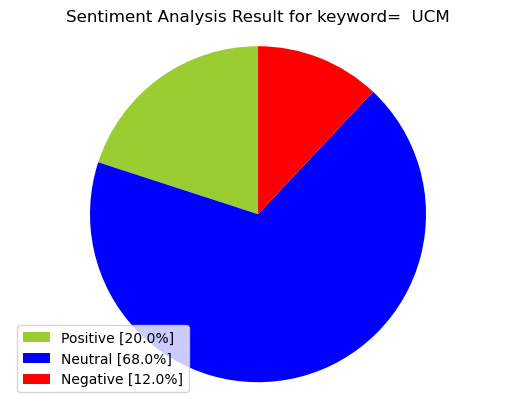

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @LonghornNetwork: KC gets KC\n\nThe Chiefs ...,RT @LonghornNetwork: KC gets KC\n\nThe Chiefs ...
1,RT @ArrowheadLive: Welcome to KC @Showout_NJ!\...,RT @ArrowheadLive: Welcome to KC @Showout_NJ!\...
2,"Worth the wait…Philadelphia EAGLESSSUH, how co...","Worth the wait…Philadelphia EAGLESSSUH, how co..."
3,RT @ArrowheadReport: The Chiefs made their sev...,RT @ArrowheadReport: The Chiefs made their sev...
4,The Chiefs made their seventh pick in as many ...,The Chiefs made their seventh pick in as many ...
...,...,...
176,Veach has brought in high level athlete after ...,Veach has brought in high level athlete after ...
180,@_JimminyCricket @brgridiron Naysayers still w...,@_JimminyCricket @brgridiron Naysayers still w...
187,Chiefs' Felix Anudike-Uzomah leads KC talent i...,Chiefs' Felix Anudike-Uzomah leads KC talent i...
189,@_JimminyCricket @brgridiron That's what i'm t...,@_JimminyCricket @brgridiron That's what i'm t...


In [10]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @LonghornNetwork: KC gets KC\n\nThe Chiefs ...,kc gets kc the chiefs select in the 6th ro...
1,RT @ArrowheadLive: Welcome to KC @Showout_NJ!\...,welcome to kc nj chiefs chiefskingdom
2,"Worth the wait…Philadelphia EAGLESSSUH, how co...",worth the wait philadelphia eaglesssuh how co...
3,RT @ArrowheadReport: The Chiefs made their sev...,the chiefs made their seventh pick in as many...
4,The Chiefs made their seventh pick in as many ...,the chiefs made their seventh pick in as many ...
5,The #Chiefs have added a stash and develop cor...,the chiefs have added a stash and develop cor...
6,Welcome to KC @Showout_NJ!\n\n#Chiefs | #Chief...,welcome to kc nj chiefs chiefskingdom
7,RT @ArrowheadAddict: The #Chiefs have grabbed ...,the chiefs have grabbed a developmental pass...
8,With the #Chiefs @chiefs final pick at 250 DB ...,with the chiefs final pick at 250 db nic jo...
9,@chiefs_outsider I dont think hunt EVER comes ...,outsider i dont think hunt ever comes back k...


In [11]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_10654/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @LonghornNetwork: KC gets KC\n\nThe Chiefs ...,kc gets kc the chiefs select in the 6th ro...,-0.200000,0.400000,neutral,0.000,1.000,0.000,0.0000
1,RT @ArrowheadLive: Welcome to KC @Showout_NJ!\...,welcome to kc nj chiefs chiefskingdom,0.800000,0.900000,positive,0.000,0.625,0.375,0.4588
2,"Worth the wait…Philadelphia EAGLESSSUH, how co...",worth the wait philadelphia eaglesssuh how co...,0.400000,0.350000,positive,0.109,0.645,0.246,0.5267
3,RT @ArrowheadReport: The Chiefs made their sev...,the chiefs made their seventh pick in as many...,0.250000,0.250000,negative,0.095,0.905,0.000,-0.2960
4,The Chiefs made their seventh pick in as many ...,the chiefs made their seventh pick in as many ...,0.250000,0.250000,negative,0.099,0.901,0.000,-0.2960
5,The #Chiefs have added a stash and develop cor...,the chiefs have added a stash and develop cor...,0.000000,1.000000,neutral,0.000,1.000,0.000,0.0000
6,Welcome to KC @Showout_NJ!\n\n#Chiefs | #Chief...,welcome to kc nj chiefs chiefskingdom,0.800000,0.900000,positive,0.000,0.625,0.375,0.4588
7,RT @ArrowheadAddict: The #Chiefs have grabbed ...,the chiefs have grabbed a developmental pass...,-0.200000,0.400000,neutral,0.000,1.000,0.000,0.0000
8,With the #Chiefs @chiefs final pick at 250 DB ...,with the chiefs final pick at 250 db nic jo...,0.166667,0.833333,positive,0.000,0.729,0.271,0.7717
9,@chiefs_outsider I dont think hunt EVER comes ...,outsider i dont think hunt ever comes back k...,-0.025000,0.200000,neutral,0.000,1.000,0.000,0.0000


In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,33,47.14
neutral,27,38.57
negative,10,14.29


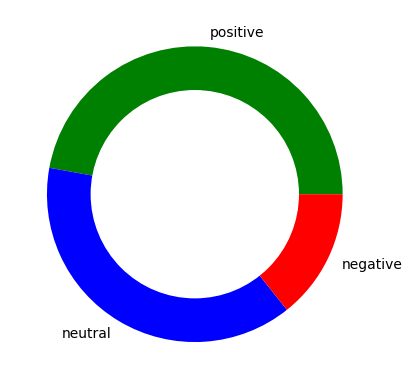

In [15]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



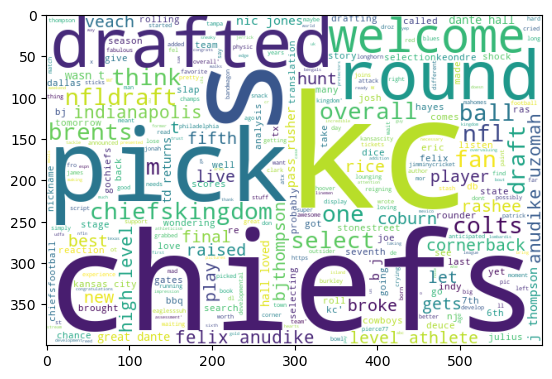

In [17]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

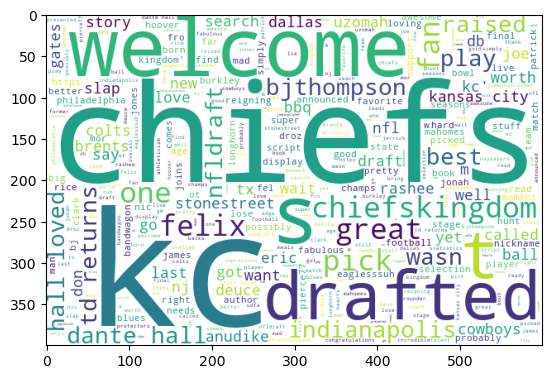

In [18]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

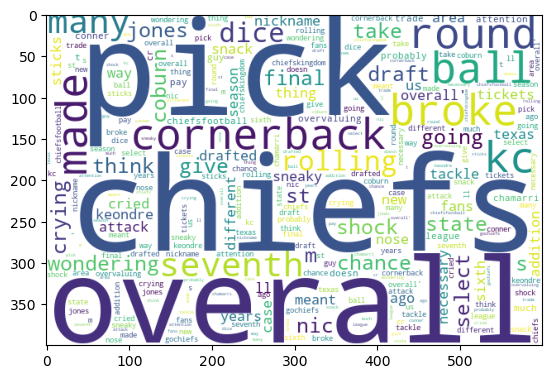

In [19]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

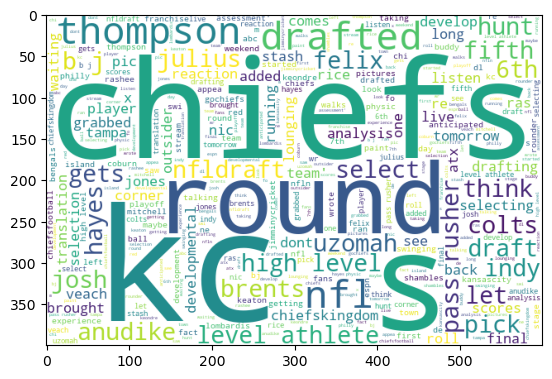

In [20]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)